<a href="https://colab.research.google.com/github/Chuvard/Hotel_project/blob/dev-1/Hotel_Hiltonview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Handle warnings
import warnings
warnings.filterwarnings("ignore")

# Download data set

In [2]:
url = 'https://raw.githubusercontent.com/{username}/{repository}/{branch}/{path}'.format(username='Chuvard', repository='Hotel_project', branch='main', path='Hotel/data/hotel.csv')
df = pd.read_csv(url)

In [3]:
# Check the data types for test data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97641 entries, 0 to 97640
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              97641 non-null  int64 
 1   is_canceled                     97641 non-null  int64 
 2   lead_time                       97641 non-null  int64 
 3   arrival_date_year               97641 non-null  int64 
 4   arrival_date_month              97641 non-null  object
 5   arrival_date_week_number        97641 non-null  int64 
 6   arrival_date_day_of_month       97641 non-null  int64 
 7   stays_in_weekend_nights         97641 non-null  int64 
 8   stays_in_week_nights            97641 non-null  int64 
 9   adults                          97641 non-null  int64 
 10  children                        97641 non-null  int64 
 11  babies                          97641 non-null  int64 
 12  meal                            97641 non-null

In [4]:
# Make overview for train data set
df.head(25)

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7,2015,July,27,1,0,1,1,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14,2015,July,27,1,0,2,2,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0,2015,July,27,1,0,2,2,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9,2015,July,27,1,0,2,2,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85,2015,July,27,1,0,3,2,...,0,0,0,A,0,0,Transient,0,1,3
5,5,1,75,2015,July,27,1,0,3,2,...,0,0,0,D,0,0,Transient,0,0,3
6,6,1,23,2015,July,27,1,0,4,2,...,0,0,0,E,0,0,Transient,0,0,4
7,7,0,18,2015,July,27,1,0,4,2,...,0,0,0,G,1,0,Transient,0,1,4
8,8,0,68,2015,July,27,1,0,4,2,...,0,0,0,D,0,0,Transient,0,3,4
9,9,0,37,2015,July,27,1,0,4,2,...,0,0,0,E,0,0,Contract,0,0,4


## Description of the data

Tables hotel_train and hotel_test contain the same columns:
* id — record number;
* is_canceled — order cancellation;
* lead_time is the number of days between the date of booking and the date of arrival;
* arrival_date_year is the year of arrival;
* arrival_date_month — month of arrival;
* arrival_date_week_number — week of arrival;
* arrival_date_day_of_month — day of arrival;
* stays_in_weekend_nights is the number of nights on weekends;
* stays_in_week_nights is the number of nights on weekdays;
* adults — the number of adult guests;
* children — the number of children from 3 to 14 years old;
* babies — number of infants;
* meal — order options:
  * SC – no additional options;
  * BB – breakfast included;
  * HB – breakfast and lunch included;
  * FB – includes breakfast, lunch and dinner.

* country — citizenship of the guest;
* distribution_channel is the distribution channel of the order;
* is_repeated_guest is a sign that the guest is booking a room for the second time;
* previous_cancellations is the number of canceled orders from the client;
* previous_bookings_not_canceled is the number of confirmed orders for the client;
* reserved_room_type is the type of room booked:
  * Category A: 600 euro per night, 200 euro one-time servise fee;
  * Category B: 500 euro per night, 150 euro one-time servise fee;
  * Category C: 450 euro per night, 150 euro one-time servise fee;
  * Category D: 400 euro per night, 150 euro one-time servise fee;
  * Category E: 300 euro per night, 100 euro one-time servise fee;
  * Category F: 200 euro per night, 100 euro one-time servise fee;
  * Category G: 150 euro per night, 100 euro one-time servise fee.

* booking_changes is the number of changes to the order parameters;
* days_in_waiting_list — how many days the order has been waiting for confirmation;
* customer_type is the type of customer:
  * Contract — an agreement with a legal entity;
  * Group — group race;
  * Transient – not linked to a contract or group ride;
  * Transient-party – not linked to a contract or group check-in, but linked to a Transient type booking.

* required_car_parking_spaces — the need for space for the car;
* total_of_special_requests is the number of special marks.
* total_nights is the total number of nights;


[!Note]
Sasonal coefficients are used in the hotel's pricing policy: in spring and summer prices increases by 40%, in autumn - by 20%.

# Data Preprocessing

## Missing Data

We have full training and test datasets without missing data inside

## Data visualization

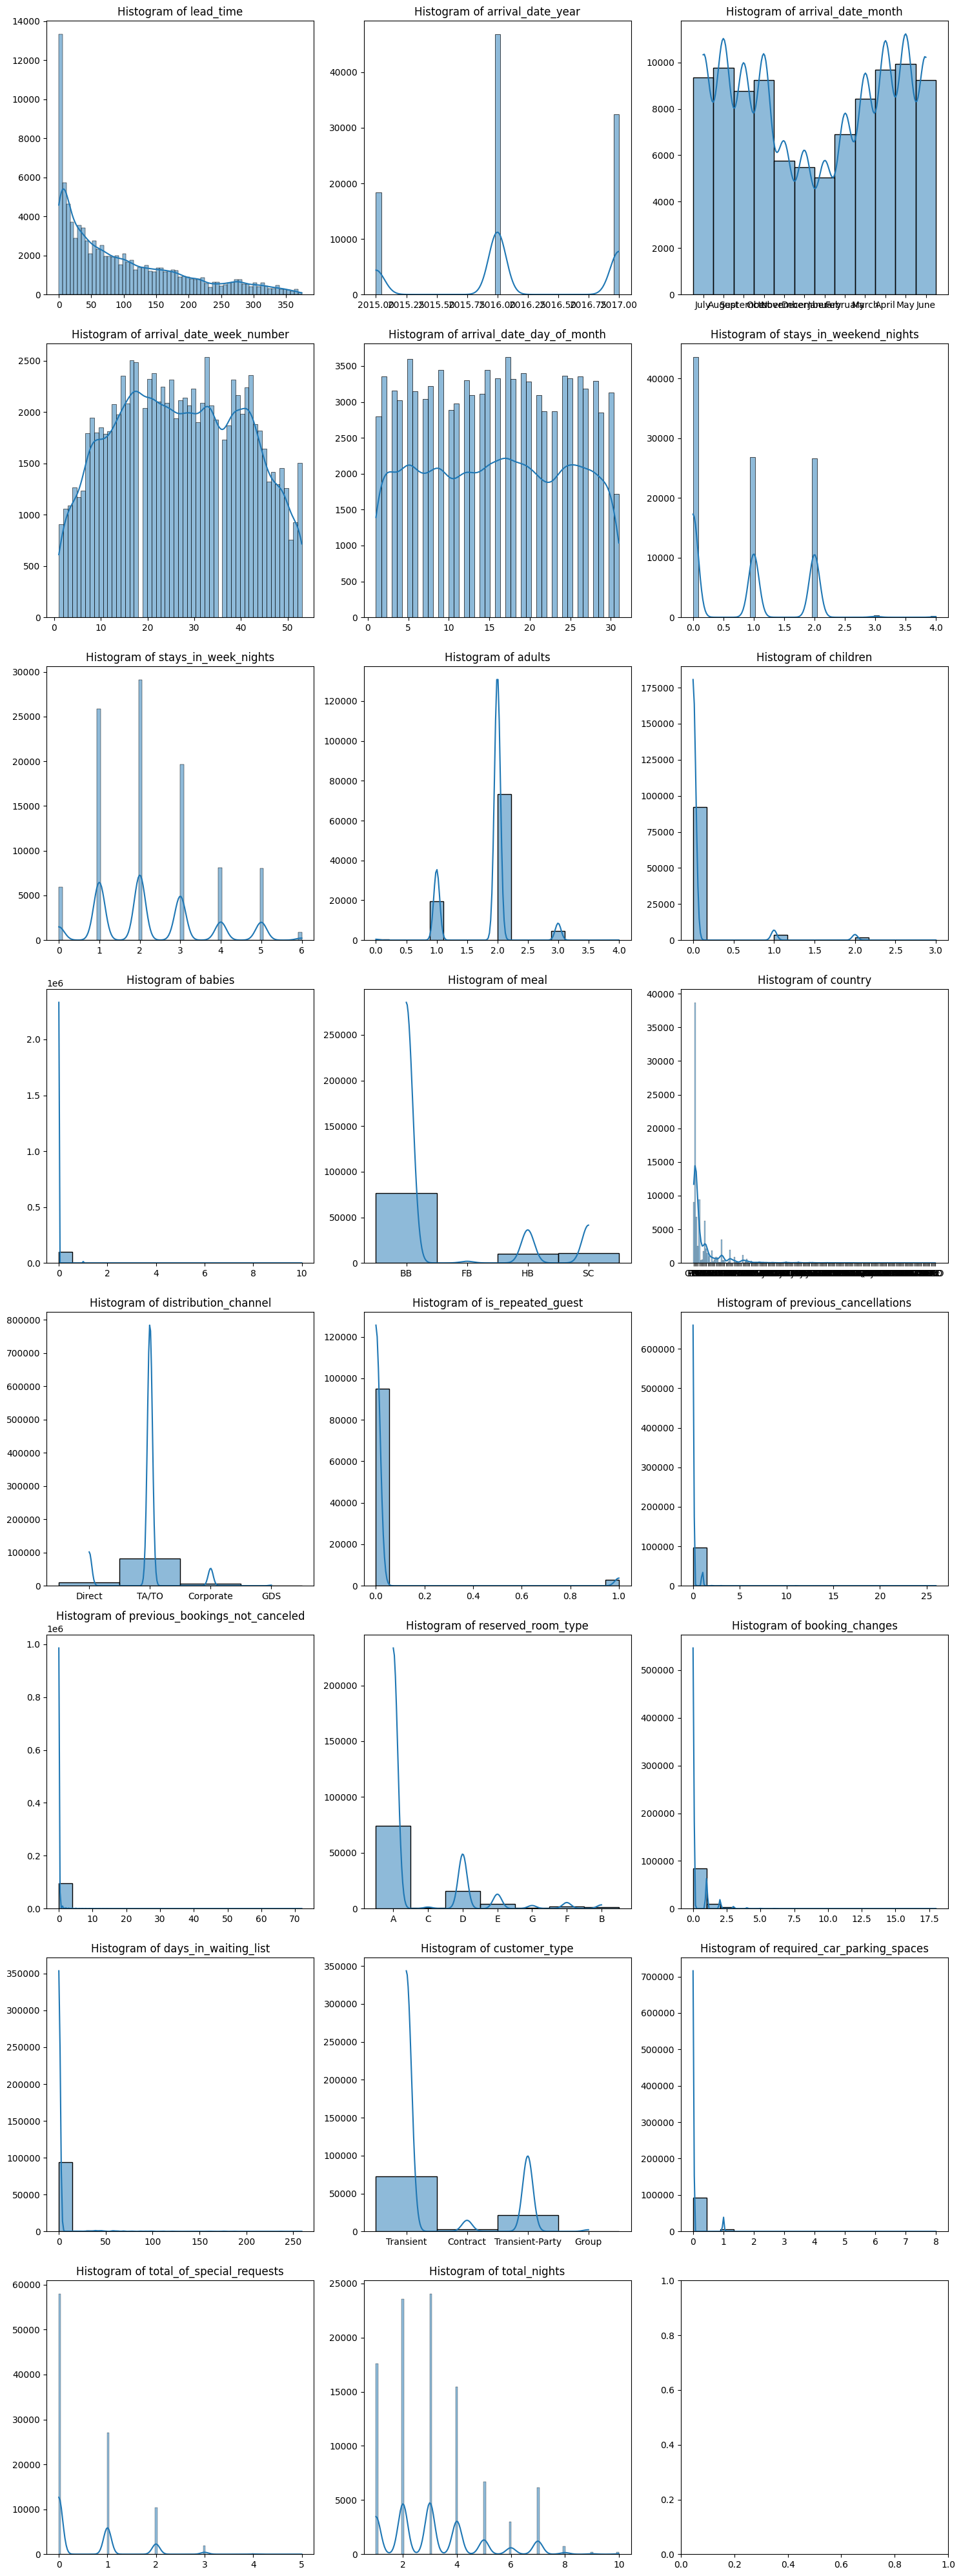

In [5]:
Xs = ['lead_time', 'arrival_date_year',
        'arrival_date_month', 'arrival_date_week_number',
        'arrival_date_day_of_month', 'stays_in_weekend_nights',
        'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
        'country', 'distribution_channel', 'is_repeated_guest',
        'previous_cancellations', 'previous_bookings_not_canceled',
        'reserved_room_type', 'booking_changes', 'days_in_waiting_list',
        'customer_type', 'required_car_parking_spaces',
        'total_of_special_requests', 'total_nights']


# Set the number of charts per row
charts_per_row = 3
total_charts = len(Xs)
rows = -(-total_charts // charts_per_row)  # Ceiling division to calculate rows

# Create subplots
fig, axes = plt.subplots(rows, charts_per_row, figsize=(15, 5 * rows))

# Flatten axes for simplicity
axes = axes.flatten()

# Loop through features and create histograms
for i, feature in enumerate(Xs):
    sns.histplot(df[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

### Categorical variables

In [6]:
def categorical_pie_chart(data: pd.DataFrame,
                          cols: int = 4,
                          legend: bool = False,
                          figsize: tuple = (18, 18)):
  """
This procedure creates a grid of pie charts for categorical features, displaying the percentage distribution of values in the column.

:param df: Data for which the chart is built
:type dataset_directory: pandas.DataFrame

:param cols: Number of charts in a row
:type root_directory: int

:param legend: Controls the display of the legend
:type categories: str

:param figsize: Controls the size of the area
:type categories: tuple(int, int)

:raises None

:rtype: None
:return: None
"""

  df = data.copy()
  df.replace(to_replace=[r'^\s*$', None, 'None,' 'Nan', 'NaN'],
             value='None',
             regex=True,
             inplace=True)
  features = list(df.select_dtypes(include='object').columns)
  rows = int(-1 * (len(features) / cols) // 1 * -1)
  fig, ax = plt.subplots(rows, cols, figsize=figsize)

  row = 0
  col = 0
  for i, feature in enumerate(features):
    ax[row, col].pie(df[feature].value_counts(),
                    autopct='%.2f',
                    labels=df[feature].value_counts().index)
    ax[row, col].set_title(feature)
    col += 1
    if col // cols == 1:
      row += 1
      col = 0

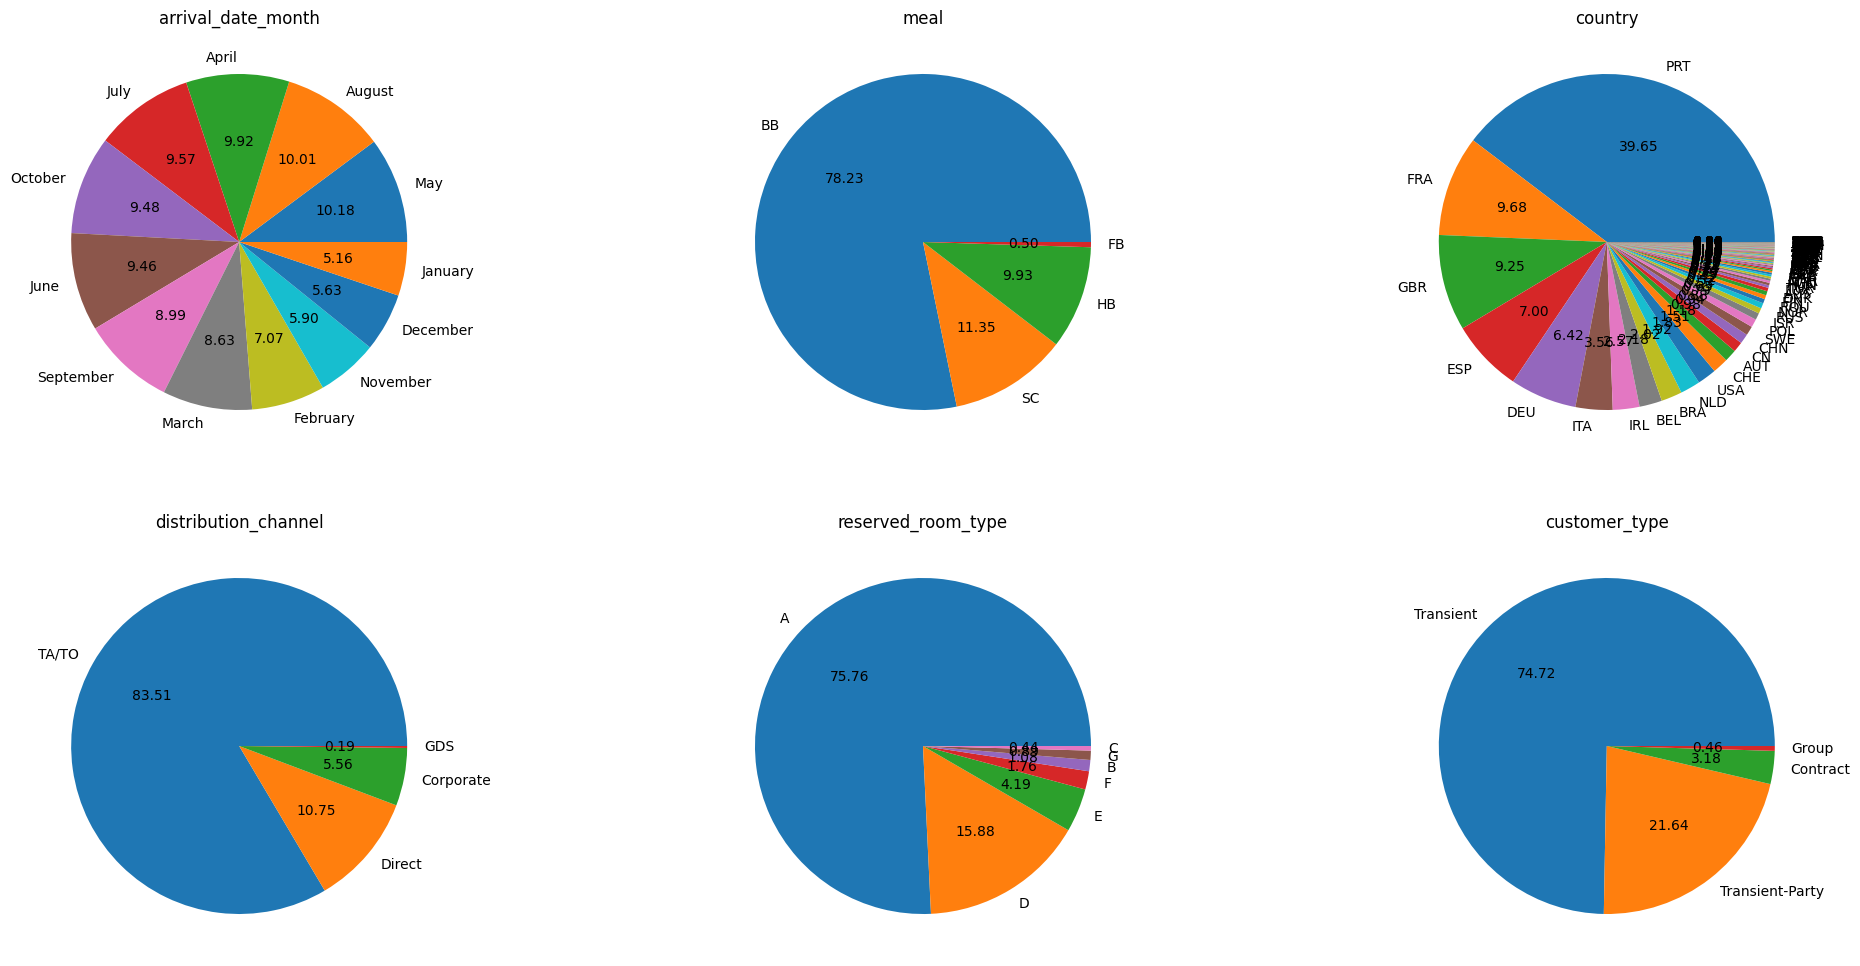

In [7]:
categorical_pie_chart(df, figsize=(25, 12), cols=3)

### Numeric variables

### Meal

In [8]:
df.meal.nunique()

4

In [9]:
df.meal.value_counts()

BB    76381
SC    11082
HB     9691
FB      487
Name: meal, dtype: int64

In [10]:
df.meal.head()

0    BB
1    BB
2    BB
3    FB
4    BB
Name: meal, dtype: object

In [11]:
# # Assuming your DataFrame column is named 'column_name'
# train_df['meal'] = train_df['meal'].str.replace('SC', 'SC', case=False)

In [12]:
# # Joining similar labels in the 'meal' column
# train_df['meal'] = train_df['meal'].replace('SC', 'Upd_SC')

# # Display the resulting DataFrame
# print(train_df['meal'])

In [13]:
df.meal.value_counts()

BB    76381
SC    11082
HB     9691
FB      487
Name: meal, dtype: int64

In [14]:
meal_sc = df[df['meal'] == 'SC']

In [15]:
print(len(meal_sc))

11082


### Country

In [16]:
df.country.value_counts()

PRT    38718
FRA     9451
GBR     9036
ESP     6832
DEU     6265
       ...  
FJI        1
BFA        1
HND        1
NAM        1
FRO        1
Name: country, Length: 174, dtype: int64

In [17]:
# Get a Series with the counts of each country
country_counts = df['country'].value_counts()

# Filter countries with less than 10 occurrences
filtered_countries = country_counts[country_counts > 40].index

# Use .map to filter 'id' based on the filtered countries
filtered_ids = df[df['country'].map(lambda x: x in filtered_countries)]['id']

print(filtered_ids)

0            0
1            1
2            2
3            3
4            4
         ...  
97636    97899
97637    97900
97638    97901
97639    97902
97640    97903
Name: id, Length: 96669, dtype: int64


In [18]:
print(len(filtered_countries))

56


## Data Distribution

In [19]:
df['country'].nunique()

174

In [20]:
df.country.value_counts()

PRT    38718
FRA     9451
GBR     9036
ESP     6832
DEU     6265
       ...  
FJI        1
BFA        1
HND        1
NAM        1
FRO        1
Name: country, Length: 174, dtype: int64

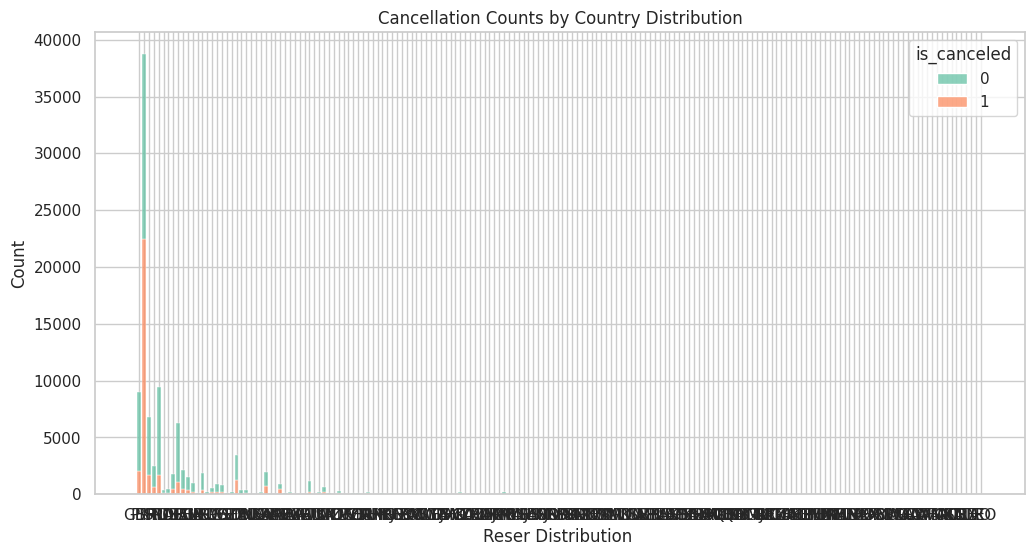

In [21]:
# Assuming train_df is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot the histogram
sns.histplot(data=df, x='country', hue='is_canceled', multiple="stack", shrink=.8, palette="Set2")

# Set labels and title
plt.xlabel("Reser Distribution ")
plt.ylabel("Count")
plt.title("Cancellation Counts by Country Distribution")

# Display the plot
plt.show()

In [22]:
df['reserved_room_type'].value_counts()

A    73972
D    15510
E     4092
F     1716
B     1052
G      870
C      429
Name: reserved_room_type, dtype: int64

In [23]:
df['reserved_room_type'].nunique()

7

In [24]:
df['reserved_room_type'].head(50)

0     A
1     A
2     C
3     C
4     A
5     D
6     E
7     G
8     D
9     E
10    A
11    G
12    A
13    A
14    D
15    D
16    A
17    D
18    D
19    A
20    D
21    E
22    G
23    D
24    F
25    A
26    G
27    A
28    E
29    E
30    D
31    A
32    C
33    A
34    A
35    G
36    E
37    F
38    A
39    A
40    G
41    A
42    A
43    A
44    D
45    A
46    A
47    A
48    A
49    E
Name: reserved_room_type, dtype: object

In [ ]:
# Assuming train_df is your DataFrame
Y = 'is_canceled'

Xs = ['id', 'lead_time', 'arrival_date_year',
        'arrival_date_month', 'arrival_date_week_number',
        'arrival_date_day_of_month', 'stays_in_weekend_nights',
        'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
        'country', 'distribution_channel', 'is_repeated_guest',
        'previous_cancellations', 'previous_bookings_not_canceled',
        'reserved_room_type', 'booking_changes', 'days_in_waiting_list',
        'customer_type', 'required_car_parking_spaces',
        'total_of_special_requests', 'total_nights']

# Subset the DataFrame with selected features
subset_df = df[Xs + [Y]]

# Set up the subplots
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(Xs):
    sns.histplot(data=subset_df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(col)

# Display the plot
plt.show()

## Correlation Matrix

In [ ]:
# Define the target value and features variables
y_train = 'is_canceled'

X_train = ['lead_time', 'arrival_date_year',
        'arrival_date_month', 'arrival_date_week_number',
        'arrival_date_day_of_month', 'stays_in_weekend_nights',
        'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
        'country', 'distribution_channel', 'is_repeated_guest',
        'previous_cancellations', 'previous_bookings_not_canceled',
        'reserved_room_type', 'booking_changes', 'days_in_waiting_list',
        'customer_type', 'required_car_parking_spaces',
        'total_of_special_requests', 'total_nights']

# Subset the DataFrame with selected features
subset_df = df[X_train + [y_train]]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap for better visualization
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()